# 표준 정규화

## 데이터 생성

In [7]:
import numpy as np
import pandas as pd

meat_consumption_korean = 5*np.random.randn(1000) + 53.9
meat_consumption_japan = 4*np.random.randn(1000) + 32.7

meat_consumption = pd.DataFrame({"한국인":meat_consumption_korean,"일본인":meat_consumption_japan})
meat_consumption.head(6)

,한국인,일본인
0,55.510982,26.847903
1,54.956034,26.988106
2,52.522137,38.305269
3,51.979579,22.459557
4,58.347594,28.159003
5,59.992694,25.572981


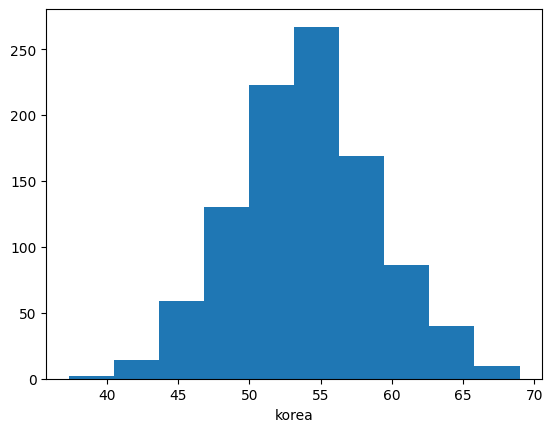

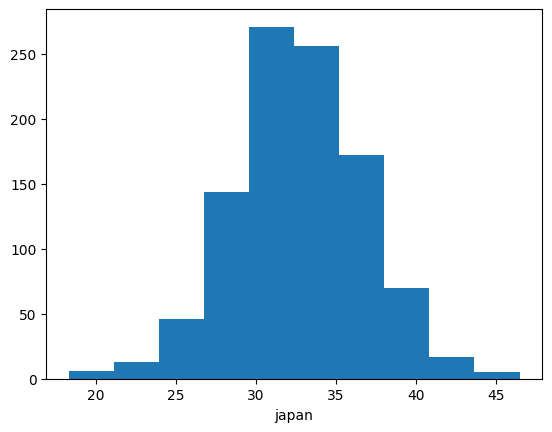

In [8]:
import matplotlib.pyplot as plt
plt.hist(meat_consumption_korean)
plt.xlabel('korea')
plt.show()
plt.hist(meat_consumption_japan)
plt.xlabel('japan')
plt.show()

## Z-표준화

In [12]:
meat_consumption["한국인_정규화2"] = (meat_consumption_korean - np.mean(meat_consumption_korean))/np.std(meat_consumption_korean)
meat_consumption["일본인_정규화2"] = (meat_consumption_japan - np.mean(meat_consumption_japan))/np.std(meat_consumption_japan)
meat_consumption.head()

,한국인,일본인,한국인_정규화,일본인_정규화,한국인_정규화2,일본인_정규화2
0,55.510982,26.847903,0.317709,-1.443732,0.317709,-1.443732
1,54.956034,26.988106,0.204118,-1.409139,0.204118,-1.409139
2,52.522137,38.305269,-0.294072,1.383206,-0.294072,1.383206
3,51.979579,22.459557,-0.405127,-2.526492,-0.405127,-2.526492
4,58.347594,28.159003,0.898329,-1.120237,0.898329,-1.120237


In [9]:
import scipy.stats as ss
meat_consumption["한국인_정규화"] = ss.zscore(meat_consumption_korean)
meat_consumption["일본인_정규화"] = ss.zscore(meat_consumption_japan)
meat_consumption.head()

,한국인,일본인,한국인_정규화,일본인_정규화
0,55.510982,26.847903,0.317709,-1.443732
1,54.956034,26.988106,0.204118,-1.409139
2,52.522137,38.305269,-0.294072,1.383206
3,51.979579,22.459557,-0.405127,-2.526492
4,58.347594,28.159003,0.898329,-1.120237


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
meat_consumption["한국인_정규화3"] = scaler.fit_transform(meat_consumption[['한국인']])
scaler = StandardScaler()
meat_consumption["일본인_정규화3"] = scaler.fit_transform(meat_consumption[['일본인']])
meat_consumption.head()

,한국인,일본인,한국인_정규화,일본인_정규화,한국인_정규화2,일본인_정규화2,한국인_정규화3,일본인_정규화3
0,55.510982,26.847903,0.317709,-1.443732,0.317709,-1.443732,0.317709,-1.443732
1,54.956034,26.988106,0.204118,-1.409139,0.204118,-1.409139,0.204118,-1.409139
2,52.522137,38.305269,-0.294072,1.383206,-0.294072,1.383206,-0.294072,1.383206
3,51.979579,22.459557,-0.405127,-2.526492,-0.405127,-2.526492,-0.405127,-2.526492
4,58.347594,28.159003,0.898329,-1.120237,0.898329,-1.120237,0.898329,-1.120237


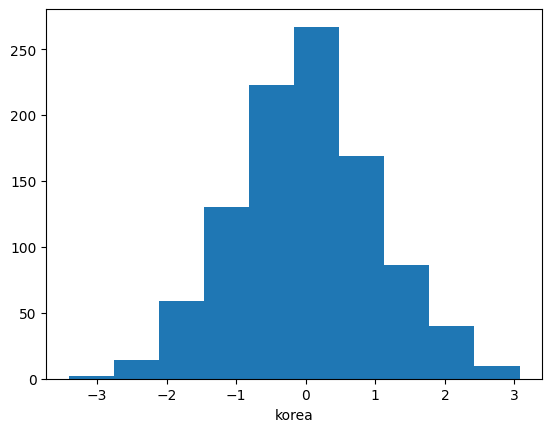

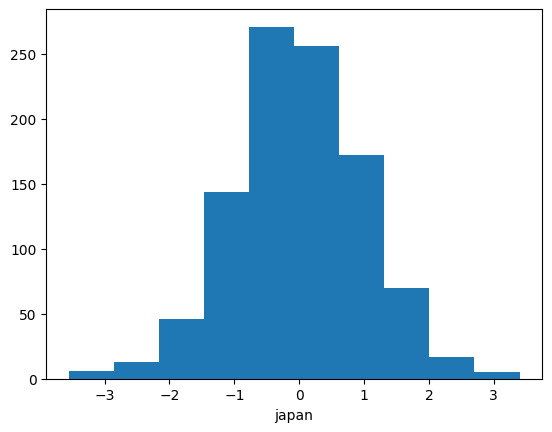

In [15]:
plt.hist(meat_consumption['한국인_정규화'])
plt.xlabel("korea")
plt.show()
plt.hist(meat_consumption['일본인_정규화'])
plt.xlabel("japan")
plt.show()

## Min_Max 정규화

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
meat_consumption["한국인_mm"] = scaler.fit_transform(meat_consumption[['한국인']])
meat_consumption["일본인_mm"] = scaler.fit_transform(meat_consumption[['일본인']])
meat_consumption.head()

,한국인,일본인,한국인_정규화,일본인_정규화,한국인_정규화2,일본인_정규화2,한국인_정규화3,일본인_정규화3,한국인_mm,일본인_mm
0,55.510982,26.847903,0.317709,-1.443732,0.317709,-1.443732,0.317709,-1.443732,0.574883,0.303639
1,54.956034,26.988106,0.204118,-1.409139,0.204118,-1.409139,0.204118,-1.409139,0.557356,0.308614
2,52.522137,38.305269,-0.294072,1.383206,-0.294072,1.383206,-0.294072,1.383206,0.480488,0.710247
3,51.979579,22.459557,-0.405127,-2.526492,-0.405127,-2.526492,-0.405127,-2.526492,0.463353,0.147901
4,58.347594,28.159003,0.898329,-1.120237,0.898329,-1.120237,0.898329,-1.120237,0.664470,0.350168


In [26]:
Min = np.min(meat_consumption_korean)
Max = np.max(meat_consumption_korean)
meat_consumption["한국인_mm2"] = (meat_consumption_korean - Min)/(Max-Min)
Min = np.min(meat_consumption_japan)
Max = np.max(meat_consumption_japan)
meat_consumption["japan_mm2"] = (meat_consumption_japan - Min)/(Max-Min)
meat_consumption.head()

,한국인,일본인,한국인_정규화,일본인_정규화,한국인_정규화2,일본인_정규화2,한국인_정규화3,일본인_정규화3,한국인_mm,일본인_mm,한국인_mm2,japan_mm2
0,55.510982,26.847903,0.317709,-1.443732,0.317709,-1.443732,0.317709,-1.443732,0.574883,0.303639,0.574883,0.303639
1,54.956034,26.988106,0.204118,-1.409139,0.204118,-1.409139,0.204118,-1.409139,0.557356,0.308614,0.557356,0.308614
2,52.522137,38.305269,-0.294072,1.383206,-0.294072,1.383206,-0.294072,1.383206,0.480488,0.710247,0.480488,0.710247
3,51.979579,22.459557,-0.405127,-2.526492,-0.405127,-2.526492,-0.405127,-2.526492,0.463353,0.147901,0.463353,0.147901
4,58.347594,28.159003,0.898329,-1.120237,0.898329,-1.120237,0.898329,-1.120237,0.664470,0.350168,0.664470,0.350168


# 정규 분포 변환

## 왜도 확인

In [28]:
df = pd.read_csv("https://raw.githubusercontent.com/YoungjinBD/dataset/main/USJudgeRatings.csv")
df.head(5)

,Unnamed: 0,CONT,INTG,DMNR,DILG,CFMG,DECI,PREP,FAMI,ORAL,WRIT,PHYS,RTEN
0,"AARONSON,L.H.",5.7,7.9,7.7,7.3,7.1,7.4,7.1,7.1,7.1,7.0,8.3,7.8
1,"ALEXANDER,J.M.",6.8,8.9,8.8,8.5,7.8,8.1,8.0,8.0,7.8,7.9,8.5,8.7
2,"ARMENTANO,A.J.",7.2,8.1,7.8,7.8,7.5,7.6,7.5,7.5,7.3,7.4,7.9,7.8
3,"BERDON,R.I.",6.8,8.8,8.5,8.8,8.3,8.5,8.7,8.7,8.4,8.5,8.8,8.7
4,"BRACKEN,J.J.",7.3,6.4,4.3,6.5,6.0,6.2,5.7,5.7,5.1,5.3,5.5,4.8


In [30]:
print(ss.skew(df['CONT']))
print(ss.skew(df['PHYS']))

1.0859724796276253
-1.5582154642293153


## log() 변환

In [33]:
df["CONT1"] = np.log(df['CONT'])
df["PHYS1"] = np.log(np.max(df['PHYS'] + 1) - df['PHYS'])

In [35]:
print(ss.skew(df['CONT1']))
print(ss.skew(df['PHYS1']))

0.6555571886692603
0.5824357748750443


## log10() 변환

In [42]:
df['PHYS2'] = np.log10(np.max(df['PHYS']+1) - df['PHYS'])
df['CONT2'] = np.log10(df['CONT'])
print(ss.skew(df['CONT2']))
print(ss.skew(df['PHYS2']))

0.6555571886692441
0.5824357748750438


## 제곱근 변환

In [43]:
df['CONT3'] = np.sqrt(df['CONT'])
df['PHY3'] = np.sqrt(np.max(df['PHYS']+1) - df['PHYS'])
print(ss.skew(df['CONT3']))
print(ss.skew(df['PHY3']))

0.8674478291185773
1.0652265141190416


## 역수 변환

In [45]:
df['CONT4'] = 1/df['CONT']
df['PHYS4'] = 1/(np.max(df['PHYS']+1)-df['PHYS'])
print(ss.skew(df['CONT4']))
print(ss.skew(df['PHYS4']))

-0.2476280921045861
0.3251465671265811


# 범주화, 이산형화

## 데이터 생성

73.5


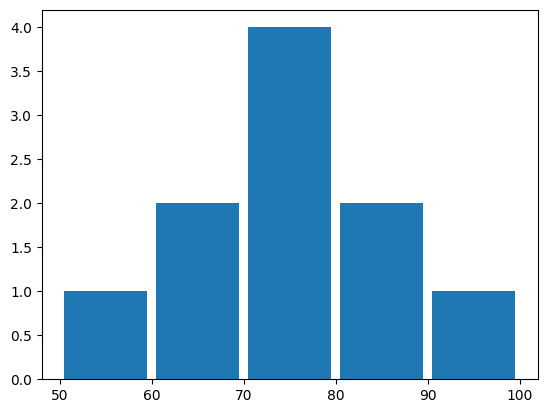

,이름,수학점수
0,철수,52
1,영희,92
2,미영,84
3,시완,71
4,미경,65
5,영환,81
6,숙경,66
7,부영,77
8,민섭,73
9,보연,74


In [66]:
data = [['철수',52],['영희',92],['미영',84],['시완',71],['미경',65],['영환',81],['숙경',66],['부영',77],['민섭',73],['보연',74]]
df = pd.DataFrame(data,columns=['이름','수학점수'])
print(np.mean(df['수학점수']))
plt.hist(df['수학점수'],bins=5,range=[50,100],rwidth=0.9)
plt.show()
df

## 조건을 사용해서 구간을 직접 지정

In [67]:
df['등급'] = '0'
df.loc[(df['수학점수']<60),'등급'] = 'F'
df.loc[((df['수학점수']>=60) & ( df['수학점수'] < 70)),'등급'] = 'D'
df.loc[((df['수학점수']>=70) & ( df['수학점수'] < 80)),'등급'] = 'C'
df.loc[((df['수학점수']>=80) & ( df['수학점수'] < 90)),'등급'] = 'B'
df.loc[((df['수학점수']>=90) & ( df['수학점수'] <= 100)),'등급'] = 'A'
df

,이름,수학점수,등급
0,철수,52,F
1,영희,92,A
2,미영,84,B
3,시완,71,C
4,미경,65,D
5,영환,81,B
6,숙경,66,D
7,부영,77,C
8,민섭,73,C
9,보연,74,C


## cut() 함수 사용

In [68]:
df['등급_cut'] = pd.cut(x=df['수학점수'],bins=[0,60,70,80,90,100],labels =['F','D','C','B','A'],include_lowest= True)
df

,이름,수학점수,등급,등급_cut
0,철수,52,F,F
1,영희,92,A,A
2,미영,84,B,B
3,시완,71,C,C
4,미경,65,D,D
5,영환,81,B,B
6,숙경,66,D,D
7,부영,77,C,C
8,민섭,73,C,C
9,보연,74,C,C


## qcut() 함수 사용

In [69]:
df['등급_qcut'] = pd.qcut(x=df['수학점수'], q= 5, labels=['F','D','C','B','A'])
df

,이름,수학점수,등급,등급_cut,등급_qcut
0,철수,52,F,F,F
1,영희,92,A,A,A
2,미영,84,B,B,A
3,시완,71,C,C,D
4,미경,65,D,D,F
5,영환,81,B,B,B
6,숙경,66,D,D,D
7,부영,77,C,C,B
8,민섭,73,C,C,C
9,보연,74,C,C,C
